 ### Aim : Develop a regression model to predict garment employee productivity.  

### Loading required libraries

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error, r2_score

### Loading dataset

In [7]:
def load_dataset(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} does not exist")
    return pd.read_csv(path)

In [12]:
# Paths
svm_path = "../data/processed/svm_neuralnet_ready.csv"
tree_path = "../data/processed/tree_model_ready.csv"

# Load data
df_svm = load_dataset(svm_path)
df_tree = load_dataset(tree_path)

# Replace with actual target column name
TARGET_COL = 'target'  # ← Update this


### Previewing snippets of processed dataset

In [13]:
df_svm.head()

,date,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,overtime_bin,wip_log,idle_men_ratio,idle_ratio,day_num,day_sin,day_cos,department_encoded,team_encoded,quarter_encoded
0,2015-01-01,0.80,26.16,7080,98,0,59.0,0.940725,5001-10000,7.011214,0.0,0.0,3,0.433884,-0.900969,0.722013,0.674148,0.759686
1,2015-01-01,0.75,3.94,960,0,0,8.0,0.886500,501-1000,6.946976,0.0,0.0,3,0.433884,-0.900969,0.752951,0.821054,0.759686
2,2015-01-01,0.80,11.41,3660,50,0,30.5,0.800570,2001-5000,6.876265,0.0,0.0,3,0.433884,-0.900969,0.722013,0.681985,0.759686
3,2015-01-01,0.80,11.41,3660,50,0,30.5,0.800570,2001-5000,6.876265,0.0,0.0,3,0.433884,-0.900969,0.722013,0.779055,0.759686
4,2015-01-01,0.80,25.90,1920,50,0,56.0,0.800382,1001-2000,7.065613,0.0,0.0,3,0.433884,-0.900969,0.722013,0.685385,0.759686


In [ ]:
df_tree.head()

,date,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,...,idle_ratio,day_num,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,department_label,quarter_label
0,2015-01-01,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725,...,0.0,3,False,False,False,True,False,False,1,0
1,2015-01-01,1,0.75,3.94,1039.0,960,0,0,8.0,0.886500,...,0.0,3,False,False,False,True,False,False,0,0
2,2015-01-01,11,0.80,11.41,968.0,3660,50,0,30.5,0.800570,...,0.0,3,False,False,False,True,False,False,1,0
3,2015-01-01,12,0.80,11.41,968.0,3660,50,0,30.5,0.800570,...,0.0,3,False,False,False,True,False,False,1,0
4,2015-01-01,6,0.80,25.90,1170.0,1920,50,0,56.0,0.800382,...,0.0,3,False,False,False,True,False,False,1,0


In [16]:
df_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   over_time              1197 non-null   int64  
 4   incentive              1197 non-null   int64  
 5   no_of_style_change     1197 non-null   int64  
 6   no_of_workers          1197 non-null   float64
 7   actual_productivity    1197 non-null   float64
 8   overtime_bin           1197 non-null   object 
 9   wip_log                1197 non-null   float64
 10  idle_men_ratio         1197 non-null   float64
 11  idle_ratio             1197 non-null   float64
 12  day_num                1197 non-null   int64  
 13  day_sin                1197 non-null   float64
 14  day_cos                1197 non-null   float64
 15  depa

In [17]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   team                   1197 non-null   int64  
 2   targeted_productivity  1197 non-null   float64
 3   smv                    1197 non-null   float64
 4   wip                    1197 non-null   float64
 5   over_time              1197 non-null   int64  
 6   incentive              1197 non-null   int64  
 7   no_of_style_change     1197 non-null   int64  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
 10  overtime_bin           1197 non-null   object 
 11  wip_log                1197 non-null   float64
 12  idle_men_ratio         1197 non-null   float64
 13  idle_ratio             1197 non-null   float64
 14  day_num                1197 non-null   int64  
 15  day_

In [15]:
TARGET_COL = "actual_productivity"


In [18]:
X_svm = df_svm.drop(columns=[TARGET_COL, "date", "overtime_bin"])
X_tree = df_tree.drop(columns=[TARGET_COL, "date", "overtime_bin"])


In [24]:
drop_cols = ["date", "overtime_bin"]
X_svm = df_svm.drop(columns=[TARGET_COL] + drop_cols)
y_svm = df_svm[TARGET_COL]
X_tree = df_tree.drop(columns=[TARGET_COL] + drop_cols)
y_tree = df_tree[TARGET_COL]

### Train test split

In [25]:
# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

### Model training and evaluation

In [26]:
# Define models
pipelines = {
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVR())
    ]),
    "NeuralNet": Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
    ]),
    "DecisionTree": Pipeline([
        ("tree", DecisionTreeRegressor(random_state=42))
    ])
}

In [27]:
# Train and evaluate
for name, model in pipelines.items():
    if name in ["SVM", "NeuralNet"]:
        X_train, X_test, y_train, y_test = X_train_svm, X_test_svm, y_train_svm, y_test_svm
    else:
        X_train, X_test, y_train, y_test = X_train_tree, X_test_tree, y_train_tree, y_test_tree

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


SVM Results:
Mean Squared Error: 0.0176
R² Score: 0.3371

NeuralNet Results:
Mean Squared Error: 0.0258
R² Score: 0.0294

DecisionTree Results:
Mean Squared Error: 0.0237
R² Score: 0.1057


In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

def train_and_tune_model(X, y, model_name, pipeline, param_grid, test_size=0.2, random_state=42):
    print(f"\n Training: {model_name}")

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Grid search
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    # Evaluation
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f" Best Params: {grid.best_params_}")
    print(f" CV R² Score: {grid.best_score_:.4f}")
    print(f" Test MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f" Test R²: {r2_score(y_test, y_pred):.4f}")

    return best_model, grid


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

pipelines = {
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR())
    ]),
    "NeuralNet": Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPRegressor(max_iter=1000, random_state=42))
    ]),
    "DecisionTree": Pipeline([
        ("tree", DecisionTreeRegressor(random_state=42))
    ])
}

param_grids = {
    "SVM": {
        "svr__C": [0.1, 1, 10],
        "svr__kernel": ["linear", "rbf"],
        "svr__gamma": ["scale", "auto"]
    },
    "NeuralNet": {
        "mlp__hidden_layer_sizes": [(50,), (100,), (100, 50)],
        "mlp__activation": ["relu", "tanh"],
        "mlp__learning_rate_init": [0.001, 0.01],
        "mlp__alpha": [0.0001, 0.001]
    },
    "DecisionTree": {
        "tree__max_depth": [3, 5, 10, None],
        "tree__min_samples_leaf": [1, 5, 10],
        "tree__criterion": ["squared_error", "absolute_error"]
    }
}


### Hyperparameter tuning 

In [37]:
results = {}

for model_name in ["SVM", "NeuralNet", "DecisionTree"]:
    if model_name in ["SVM", "NeuralNet"]:
        X, y = X_svm, y_svm
    else:
        X, y = X_tree, y_tree

    best_model, grid = train_and_tune_model(
        X, y,
        model_name,
        pipelines[model_name],
        param_grids[model_name]
    )
    results[model_name] = {
        "model": best_model,
        "grid": grid
    }



 Training: SVM
 Best Params: {'svr__C': 1, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
 CV R² Score: 0.3546
 Test MSE: 0.0176
 Test R²: 0.3371

 Training: NeuralNet
 Best Params: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate_init': 0.01}
 CV R² Score: 0.3534
 Test MSE: 0.0176
 Test R²: 0.3379

 Training: DecisionTree
 Best Params: {'tree__criterion': 'squared_error', 'tree__max_depth': 10, 'tree__min_samples_leaf': 10}
 CV R² Score: 0.3295
 Test MSE: 0.0162
 Test R²: 0.3903


### Results and Visualisation

In [39]:
import matplotlib.pyplot as plt

def plot_all_predictions(results, datasets, target_col):
    """
    Plot predicted vs actual for all models in results.
    :param results: dict with model names and best estimators
    :param datasets: dict with 'X_test', 'y_test' per model
    :param target_col: name of the target variable
    """
    plt.figure(figsize=(18, 5))

    for idx, (model_name, result) in enumerate(results.items()):
        X_test = datasets[model_name]['X_test']
        y_test = datasets[model_name]['y_test']
        y_pred = result['model'].predict(X_test)

        plt.subplot(1, 3, idx + 1)
        plt.scatter(y_test, y_pred, alpha=0.4)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"{model_name}: Predicted vs Actual")
        plt.grid(True)

    plt.tight_layout()
    plt.show()



In [40]:
datasets = {
    "SVM": {"X_test": X_test_svm, "y_test": y_test_svm},
    "NeuralNet": {"X_test": X_test_svm, "y_test": y_test_svm},
    "DecisionTree": {"X_test": X_test_tree, "y_test": y_test_tree}
}


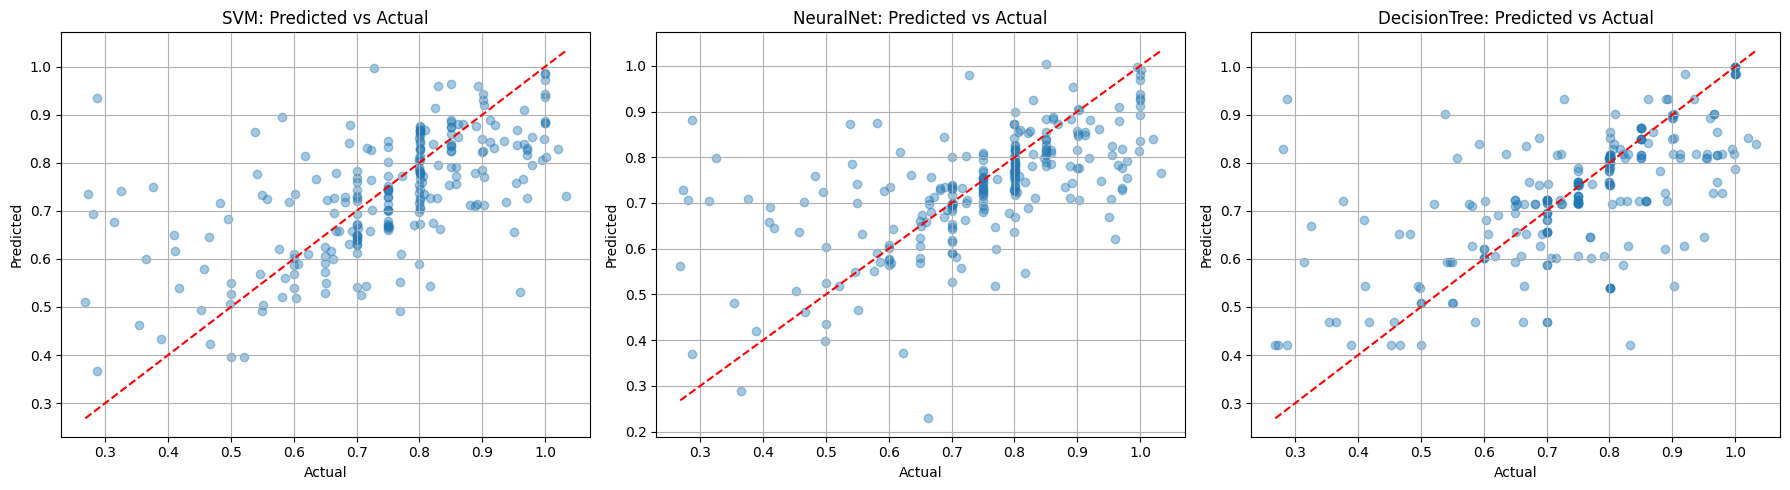

In [41]:
plot_all_predictions(results, datasets, target_col="actual_productivity")


In [44]:
def plot_all_residuals(results, datasets):
    """
    Plot residuals (actual - predicted) vs predicted for all models.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(18, 5))

    for idx, (model_name, result) in enumerate(results.items()):
        X_test = datasets[model_name]["X_test"]
        y_test = datasets[model_name]["y_test"]
        y_pred = result["model"].predict(X_test)
        residuals = y_test - y_pred

        plt.subplot(1, 3, idx + 1)
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(0, color='r', linestyle='--')
        plt.xlabel("Predicted")
        plt.ylabel("Residual (Actual - Predicted)")
        plt.title(f"{model_name} Residuals")
        plt.grid(True)

    plt.tight_layout()
    plt.show()



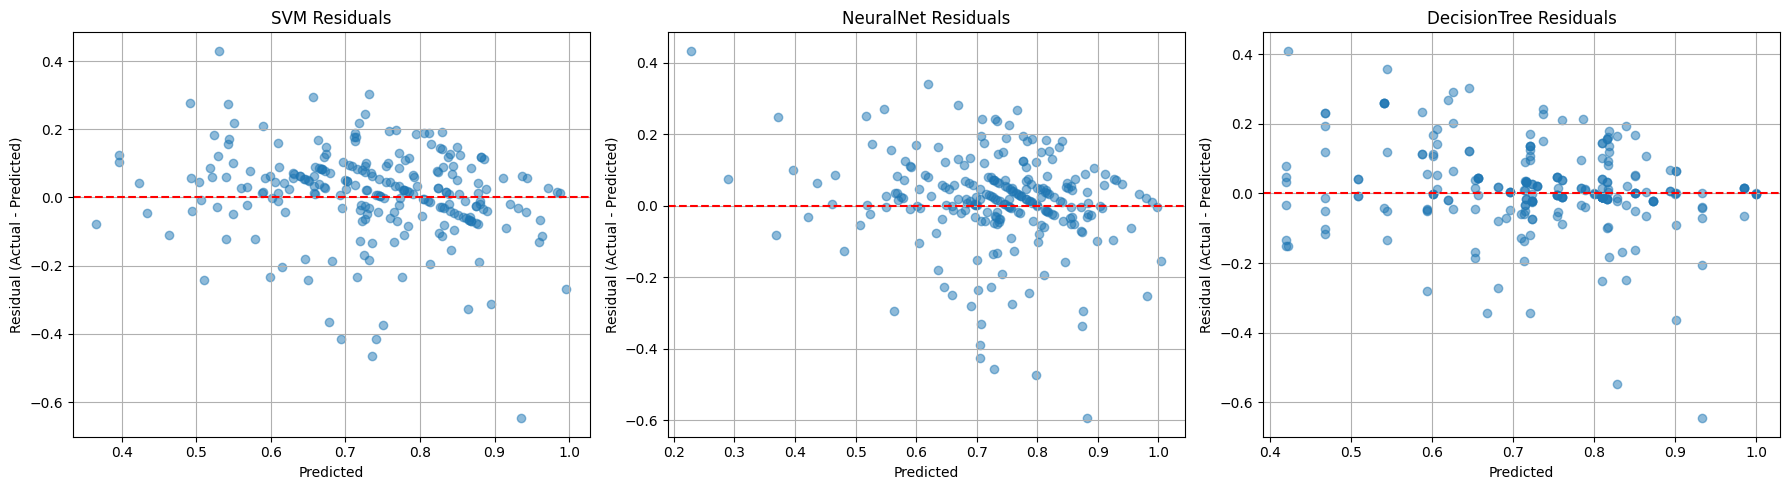

In [45]:
plot_all_residuals(results, datasets)


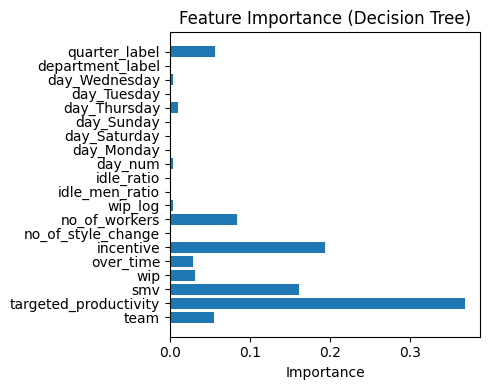

In [48]:
importances = results["DecisionTree"]["model"].named_steps["tree"].feature_importances_
feature_names = X_tree.columns

plt.figure(figsize=(5, 4))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Decision Tree)")
plt.tight_layout()
plt.show()


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train_tree, y_train_tree)
y_pred_rf = rf_model.predict(X_test_tree)

print("Random Forest R²:", r2_score(y_test_tree, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test_tree, y_pred_rf))


Random Forest R²: 0.5322767641335853
Random Forest MSE: 0.012419205562662378


In [47]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 5, 10]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train_tree, y_train_tree)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF CV R²:", rf_grid.best_score_)

y_pred_rf = rf_grid.best_estimator_.predict(X_test_tree)
print("Test R²:", r2_score(y_test_tree, y_pred_rf))


Best RF Params: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
Best RF CV R²: 0.47260273060846014
Test R²: 0.5221930144353718


## Interpretation

After evaluating multiple regression models—**SVM**, **NeuralNet**, and **Decision Tree**—we extended the analysis to include a **Random Forest Regressor**. This ensemble-based model delivered a **substantial performance boost** using the same dataset and preprocessing pipeline as the Decision Tree.

### Performance Comparison

| Model           | CV R² Score | Test R² Score | Test MSE |
|------------------|--------------|----------------|-----------|
| SVM              | 0.35         | 0.34           | 0.0176    |
| Neural Net       | 0.35         | 0.34           | 0.0176    |
| Decision Tree    | 0.33         | 0.39           | 0.0162    |
|  **Random Forest** | **0.47**     | **0.52**         | **0.0124** |

### Key Takeaways

- **Random Forest** captured nonlinear patterns and smoothed over noise significantly better than individual models.
- It improved the **test R² from ~0.34 to 0.52**, representing a **~54% gain in explained variance**.
- This makes it a strong candidate for further refinement or deployment.

